## Portfolio Part 4

In this Portfolio task I am working with the datasets "stroke" . The data was collected through the https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?select=healthcare-dataset-stroke-data.csv, which consisits following attirbute infromation:

| id | gender | age | hypertension | heart_disease | ever_married | work_type | Residence_type | avg_glucose_level | bmi | smoking_status | stroke |
   | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
   
    1) id: unique identifier
    2) gender: "Male", "Female" or "Other"
    3) age: age of the patient
    4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
    5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
    6) ever_married: "Yes" or "No"
    7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
    8) Residence_type: "Rural" or "Urban"
    9) avg_glucose_level: average glucose level in blood
    10) bmi: body mass index
    11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"
    12) stroke: 1 if the patient had a stroke or 0 if not
    
Proposal: Based on input criteria such as gender, age, various diseases, and smoking status, I use this dataset to predict whether a patient is likely to have a stroke or not. Therefore, I performed various regression and classification model. 

### Import the Data


In [202]:
import pandas as pd

stroke_df = pd.read_csv('files/stroke.csv')
stroke_df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Explore the dataset

In [203]:
stroke_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


#### Finding: 
    Numerical values : id, age, hypertension, heart_disease, avg_gluscose_level, bmi, stroke.
    Categorical values: gender, ever_married, work_type, Residence_type, Smoking_status

### Missing value Analysis

In [204]:
print('The total number of length before removing missing data is ', len(stroke_df))

The total number of length before removing missing data is  5110


In [205]:
# Checking missing data
print('Total missing values: ',sum(stroke_df.isnull().sum()))

Total missing values:  201


In [206]:
# removin missing data
stroke_df.dropna(inplace = True)

In [207]:
print('The total nunmber of length after removing missing data is ', len(stroke_df))

The total nunmber of length after removing missing data is  4909


In [208]:
print("After remving missing data, the number of rows and columns :", stroke_df.shape)

After remving missing data, the number of rows and columns : (4909, 12)


In [209]:
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Conversion of categorical varaible into numerical

In [210]:
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder(dtype=int)
stroke_df[["gender_code", "ever_married_code", "work_type_code","Residence_type_code", "smoking_status_code"]] = ord_enc.fit_transform(stroke_df[["gender", "ever_married","work_type","Residence_type","smoking_status"]])
stroke_df[["gender", "gender_code", "ever_married", "ever_married_code", "work_type", "work_type_code","Residence_type","Residence_type_code","smoking_status","smoking_status_code"]].head(11)

,gender,gender_code,ever_married,ever_married_code,work_type,work_type_code,Residence_type,Residence_type_code,smoking_status,smoking_status_code
0,Male,1,Yes,1,Private,2,Urban,1,formerly smoked,1
2,Male,1,Yes,1,Private,2,Rural,0,never smoked,2
3,Female,0,Yes,1,Private,2,Urban,1,smokes,3
4,Female,0,Yes,1,Self-employed,3,Rural,0,never smoked,2
5,Male,1,Yes,1,Private,2,Urban,1,formerly smoked,1
6,Male,1,Yes,1,Private,2,Rural,0,never smoked,2
7,Female,0,No,0,Private,2,Urban,1,never smoked,2
9,Female,0,Yes,1,Private,2,Urban,1,Unknown,0
10,Female,0,Yes,1,Private,2,Rural,0,never smoked,2
11,Female,0,Yes,1,Govt_job,0,Rural,0,smokes,3


In [211]:
stroke_df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_code,ever_married_code,work_type_code,Residence_type_code,smoking_status_code
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1,2,1,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,1,2,0,2
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,1,2,1,3
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,1,3,0,2
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1,1,1,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0,0,0,4,0,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,0,1,3,1,2
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0,1,3,0,2
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,1,1,2,0,1


### Correlation and analysis

In [212]:
stroke_df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_code,ever_married_code,work_type_code,Residence_type_code,smoking_status_code
id,1.000000,0.008984,0.001147,0.004016,0.006409,0.003084,0.004839,0.007065,0.016841,-0.022644,0.004978,0.018482
age,0.008984,1.000000,0.274425,0.257123,0.235838,0.333398,0.232331,-0.030738,0.680782,-0.366987,0.010948,0.275515
hypertension,0.001147,0.274425,1.000000,0.115991,0.180543,0.167811,0.142515,0.021578,0.162406,-0.052750,-0.001074,0.110808
heart_disease,0.004016,0.257123,0.115991,1.000000,0.154525,0.041357,0.137938,0.082712,0.111245,-0.030373,-0.002362,0.055236
avg_glucose_level,0.006409,0.235838,0.180543,0.154525,1.000000,0.175502,0.138936,0.053664,0.151377,-0.050581,-0.007617,0.066335
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374,-0.026678,0.341695,-0.304876,-0.000122,0.224473
stroke,0.004839,0.232331,0.142515,0.137938,0.138936,0.042374,1.000000,0.006757,0.105089,-0.033756,0.006031,0.051558
gender_code,0.007065,-0.030738,0.021578,0.082712,0.053664,-0.026678,0.006757,1.000000,-0.037237,0.058560,-0.005014,-0.060004
ever_married_code,0.016841,0.680782,0.162406,0.111245,0.151377,0.341695,0.105089,-0.037237,1.000000,-0.357946,0.004989,0.264642
work_type_code,-0.022644,-0.366987,-0.052750,-0.030373,-0.050581,-0.304876,-0.033756,0.058560,-0.357946,1.000000,-0.005422,-0.310911


In [213]:
print("The correlation between age and stroke:",stroke_df['age'].corr(stroke_df['stroke']) )
print("The correlation between hypertension and stroke:", stroke_df['hypertension'].corr(stroke_df['stroke']))
print("The correlation between heart_disease and stroke:", stroke_df['heart_disease'].corr(stroke_df['stroke']))
print("The correlation between ever_married and stroke:", stroke_df['ever_married_code'].corr(stroke_df['stroke']))
print("The correlation between avg_glucose_level and stroke:", stroke_df['avg_glucose_level'].corr(stroke_df['stroke']))
print("The correlation between bmi and stroke:", stroke_df['bmi'].corr(stroke_df['stroke']))
print("The correlation between smoking_status and stroke:", stroke_df['smoking_status_code'].corr(stroke_df['stroke']))
print("The correlation between Residence type and stroke:", stroke_df['Residence_type_code'].corr(stroke_df['stroke']))
print("The correlation between work type and stroke:", stroke_df['work_type_code'].corr(stroke_df['stroke']))

The correlation between age and stroke: 0.23233085553484958
The correlation between hypertension and stroke: 0.14251460588112616
The correlation between heart_disease and stroke: 0.13793778762219294
The correlation between ever_married and stroke: 0.10508914386474429
The correlation between avg_glucose_level and stroke: 0.13893586200507033
The correlation between bmi and stroke: 0.04237366114923354
The correlation between smoking_status and stroke: 0.05155826107718163
The correlation between Residence type and stroke: 0.006031426465803245
The correlation between work type and stroke: -0.033756025568612576


Insights: 
Based on above correlation data it appears that age is a significant role in stroke patients: the older you grow, the higher your risk. Similarly, the second highest cause is hypertension followed by heart disease and average glucose level. 
Rest there are less noticeable relation can be seen with stroke. 

### Plotting and anlaysis

<AxesSubplot:xlabel='stroke', ylabel='age'>

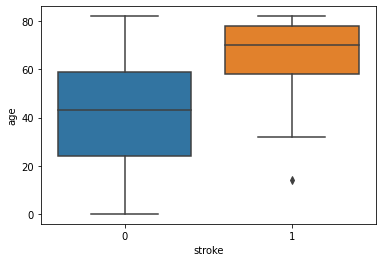

In [214]:
# age and stroke correlation
plt.figure()
sns.boxplot(x='stroke', y='age', data = stroke_df, orient="v")

<AxesSubplot:xlabel='stroke', ylabel='avg_glucose_level'>

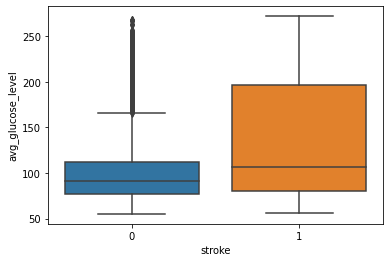

In [215]:
# avg. glucose levels and stroke correlation
plt.figure()
sns.boxplot(x='stroke', y='avg_glucose_level', data = stroke_df, orient="v")

<AxesSubplot:xlabel='stroke', ylabel='bmi'>

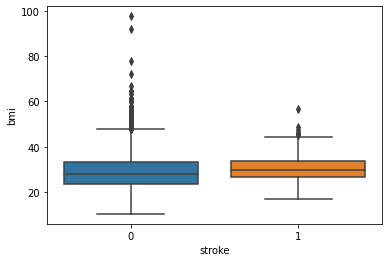

In [216]:
# bmi and stroke correlation
plt.figure()
sns.boxplot(x='stroke', y='bmi', data = stroke_df, orient="v")

According to above plot, we can summarize as "Age is a big impact, whereas BMI and average glucose levels have minor correlations." Chances of suffering a stroke increase, as age become older.

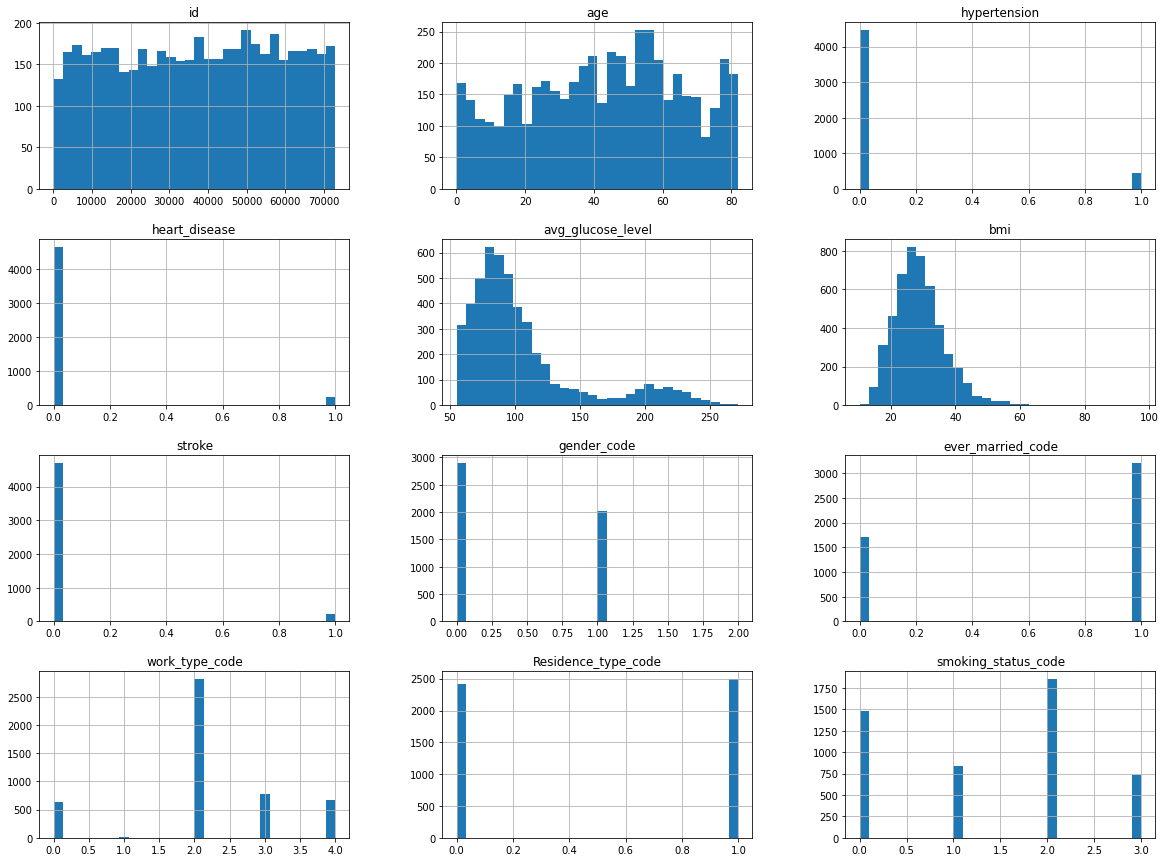

In [217]:
stroke_df.hist(bins=30, figsize=(20,15))
plt.show()

### Unwanted Columns excluded

In [218]:
new_df = stroke_df[['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi','stroke']]
new_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
5,81.0,0,0,186.21,29.0,1
...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0
5106,81.0,0,0,125.20,40.0,0
5107,35.0,0,0,82.99,30.6,0
5108,51.0,0,0,166.29,25.6,0


### Data Modeling

### Linear Regression Model

In [294]:
#first import some of the sklearn and regresssion module
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
import numpy as np

In [295]:
#training data
train, test = train_test_split(new_df, test_size = 0.2, random_state = 42)

In [296]:
reg_a = linear_model.LinearRegression()
X_train = train[['age', 'avg_glucose_level']]
y_train = train[['stroke']]

X_test= test[['age','avg_glucose_level']]
y_tes = test[['stroke']]

reg.fit(X_train, y_train)
print("y = x *", reg.coef_, "+", reg.intercept_)

y = x * [[0.00173727 0.00043618]] + [-0.08048538]


In [297]:
pred = reg.predict(X_test)

### Evaluation

In [298]:
mse = ((np.array(y_test)-pred)**2).sum()/len(y_test)
rmse = r2_score(y_test, pred)
print("The Mean Square Error (MSE):", mse)
print("Root MSE:", np.sqrt(mse))

The Mean Square Error (MSE): 50.69047101810805
Root MSE: 7.119724083004063


As the value of Mean Square Error and Root MSE seems very high. Therefore, this model 'linear regression' doesn't seems to be perfect for prediction of stroke. 

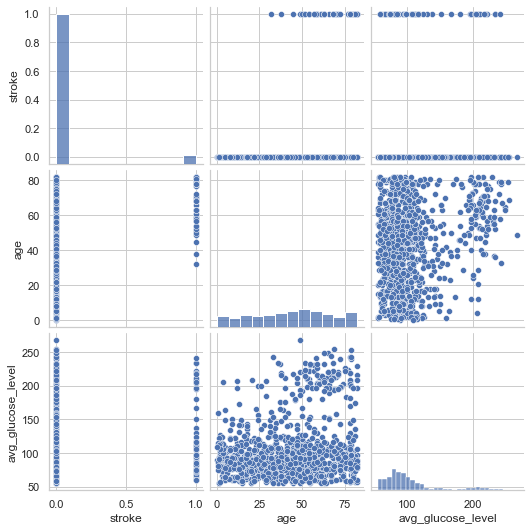

In [299]:
sns.pairplot(test[['stroke', 'age','avg_glucose_level']])

<BarContainer object of 1 artists>

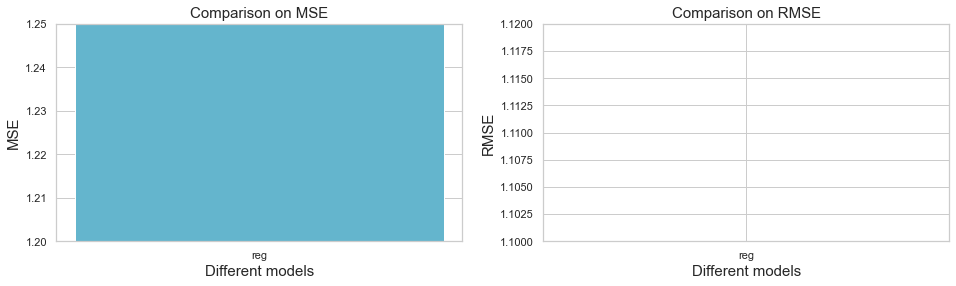

In [300]:
# create dataframe for the mse values and rmse values
mse_df = pd.DataFrame({'mse': [mse]}, index=['reg'])
rmse_df = pd.DataFrame({'rmse': [rmse]}, index=['reg_M1'])

# plot figures to show the mse and rmse results of different cases
sns.set(style="whitegrid")
plt.figure(figsize=(16,4))
plt.subplot(1, 2, 1)
plt.ylim(1.2,1.25)
plt.xlabel('Different models', size=15)
plt.ylabel('MSE', size=15)
plt.title("Comparison on MSE", size=15)
plt.bar(data=mse_df, height='mse', x=['reg'], color='c')
plt.subplot(1, 2, 2)
plt.ylim(1.10,1.12)
plt.xlabel('Different models', size=15)
plt.ylabel('RMSE', size=15)
plt.title("Comparison on RMSE", size=15)
plt.bar(data=rmse_df, height='rmse', x=['reg'], color='m')

### Logistic Regression Model

In [301]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [302]:
#create linear regression object
reg = linear_model.LinearRegression()

In [303]:
X = new_df.drop(['stroke'], axis=1)
y = new_df['stroke']

In [304]:
# Split  data into training(70%) and testing data (30%) and use random_state=142
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
X_train.shape, X_test.shape

((3927, 5), (982, 5))

In [305]:
# Training Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [306]:
# Predictions on train and test set
y_ped_train = model.predict(X_train)
y_ped_test = model.predict(X_test)

In [307]:
y_ped_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Evaluation

In [308]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [309]:
# Evaluate the performance of your trained model

print("Accuracy score on training set: ", accuracy_score(y_train, y_ped_train))
print("Accuracy score on testing set: ", accuracy_score(y_test, y_ped_test))

Accuracy score on training set:  0.9597657244716068
Accuracy score on testing set:  0.9480651731160896


#### Confusion Matrix

In [310]:
# Checking confusion matrix
print("Confusion matrix on test set: ")
print(confusion_matrix(y_test, y_ped_test))

Confusion matrix on test set: 
[[931   0]
 [ 51   0]]


In [249]:
print("Confusion matrix on train set: ")
print(confusion_matrix(y_train, y_ped_train))

Confusion matrix on train set: 
[[3769    0]
 [ 158    0]]


In the output, 3769 is actual predictions, and 158 is incorrect predictions.

### RFE

In [318]:
from sklearn.feature_selection import RFE

In [319]:
# creating RFE object
lr_model = LogisticRegression()
rfe = RFE(estimator=lr_model, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [320]:
# doing evaluation
y_test_ped = rfe.predict(X_test)
print("accuracy score on test set: ", accuracy_score(y_test, y_test_ped))

accuracy score on test set:  0.9480651731160896


#### Features  Selection

In [316]:
# summarize all features
for i in range(X_train.shape[1]):
    print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected True, Rank: 1.000
Column: 4, Selected True, Rank: 1.000


In [322]:
# to increment number of features, one at each time
acc_scores = []
for i in range(1,10):
    clf = LogisticRegression()
    rfe = RFE(estimator=clf, n_features_to_select=i)
    # training model
    rfe.fit(X_train, y_train)
    # predicting on test set
    y_pred = rfe.predict(X_test)
    acc_score = accuracy_score(y_test, y_pred)
    # print this
    print("Acc on test set using", i, "features: ", acc_score)
    # append to the list
    acc_scores.append(acc_score)

Acc on test set using 1 features:  0.9480651731160896
Acc on test set using 2 features:  0.9480651731160896
Acc on test set using 3 features:  0.9480651731160896
Acc on test set using 4 features:  0.9480651731160896
Acc on test set using 5 features:  0.9480651731160896
Acc on test set using 6 features:  0.9480651731160896
Acc on test set using 7 features:  0.9480651731160896
Acc on test set using 8 features:  0.9480651731160896
Acc on test set using 9 features:  0.9480651731160896


In [448]:
from sklearn.metrics import classification_report

#import warnings
#warnings.filterwarnings('ignore')

In [451]:
prediction = model.predict(X_test)
classification_report(y_test, prediction)

'              precision    recall  f1-score   support\n\n           0       0.98      0.91      0.94      1419\n           1       0.17      0.50      0.26        54\n\n    accuracy                           0.89      1473\n   macro avg       0.58      0.70      0.60      1473\nweighted avg       0.95      0.89      0.92      1473\n'

Logistic Regression model seems to be perfect for predicting the stroke by age than linear regression as the accuracy level is 0.94. 

Text(66.5, 0.5, 'Truth')

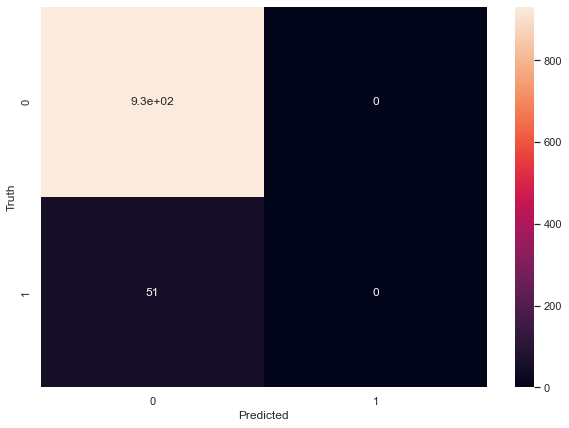

In [326]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

## K-Nearest Model

In [333]:
new_df

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0,1,228.69,36.6,1
2,80.0,0,1,105.92,32.5,1
3,49.0,0,0,171.23,34.4,1
4,79.0,1,0,174.12,24.0,1
5,81.0,0,0,186.21,29.0,1
...,...,...,...,...,...,...
5104,13.0,0,0,103.08,18.6,0
5106,81.0,0,0,125.20,40.0,0
5107,35.0,0,0,82.99,30.6,0
5108,51.0,0,0,166.29,25.6,0


In [360]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score


In [366]:
#split into training and data set.
X = new_df.drop(['stroke'], axis=1)
y = new_df['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [367]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [368]:
#import KNeighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [369]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [370]:
knn.predict_proba(X_test)[:,0]

array([1.000000, 1.000000, 1.000000, ..., 1.000000, 1.000000, 1.000000])

In [371]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.9511


In [373]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

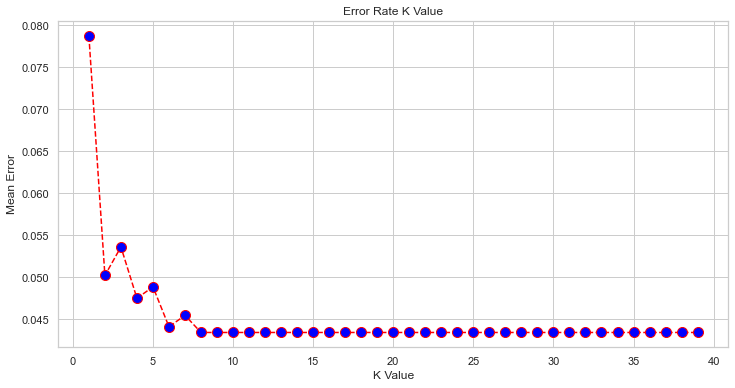

In [374]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

#### Parameter tuning with cross validation

In [372]:
from sklearn.model_selection import cross_val_score, KFold

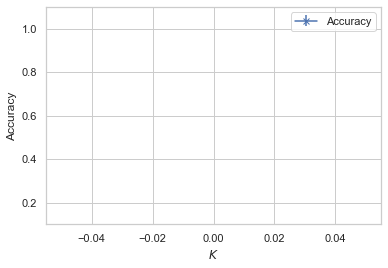

In [375]:
import matplotlib.pyplot as plt

cv_scores = []
cv_scores_std = []
k_range = range(1, 135, 5)
for i in k_range:
    clf = KNeighborsClassifier(n_neighbors = i)
    scores = cross_val_score(clf, new_df, scoring='accuracy', cv=KFold(n_splits=10, shuffle=True))
    cv_scores.append(scores.mean())
    cv_scores_std.append(scores.std())

# Plot the relationship
plt.errorbar(k_range, cv_scores, yerr=cv_scores_std, marker='x', label='Accuracy')
plt.ylim([0.1, 1.1])
plt.xlabel('$K$')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [388]:
cv_scores = []
cv_scores_std = []
k_range = range(1, 150, 5)
for i in k_range:
    classifier = KNeighborsClassifier(n_neighbors=i)
    classifier.fit(X_train, y_train)


    # fit the model to the training set
    classifier.fit(X_train, y_train)


    # predict on the test-set
    y_pred_i = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred_i)
    print('Model accuracy score with k=i : {0:0.4f}'. format(accuracy))

Model accuracy score with k=i : 0.9212
Model accuracy score with k=i : 0.9559
Model accuracy score with k=i : 0.9566
Model accuracy score with k=i : 0.9566
Model accuracy score with k=i : 0.9566
Model accuracy score with k=i : 0.9566
Model accuracy score with k=i : 0.9566
Model accuracy score with k=i : 0.9566
Model accuracy score with k=i : 0.9566
Model accuracy score with k=i : 0.9566
Model accuracy score with k=i : 0.9566
Model accuracy score with k=i : 0.9566
Model accuracy score with k=i : 0.9566
Model accuracy score with k=i : 0.9566
Model accuracy score with k=i : 0.9566
Model accuracy score with k=i : 0.9566
Model accuracy score with k=i : 0.9566
Model accuracy score with k=i : 0.9566
Model accuracy score with k=i : 0.9566
Model accuracy score with k=i : 0.9566
Model accuracy score with k=i : 0.9566
Model accuracy score with k=i : 0.9566
Model accuracy score with k=i : 0.9566
Model accuracy score with k=i : 0.9566
Model accuracy score with k=i : 0.9566
Model accuracy score with

Interpretation
Our original model accuracy score is 0.9511. Now, we can see that if we increase the value of k further, this would result in enhanced accuracy. With the increment in the value of k again, the value drops becuase when K is bigger than 85, the model goes underfitting. 
We can conclude that our classification model accuracy is very good as per above result.


### Naive Bayes Classifier

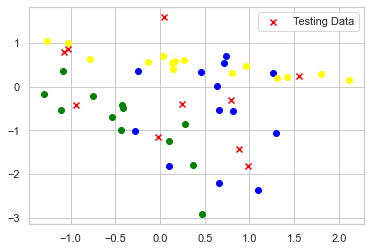

In [432]:
# Generate a synthetica 2D dataset
X, y = make_classification(n_samples=50, n_features=2, n_informative=2,
                           n_redundant=0, n_classes=3, n_clusters_per_class=1, 
                           weights=None, flip_y=0.01, class_sep=0.5, hypercube=True,
                           shift=0.0, scale=1.0, shuffle=True, random_state=42)

# Data split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Visualize the generated data
colors = ['blue', 'yellow', 'green']
for i, color in enumerate(colors):
    plt.scatter(X_train[y_train == i, 0], X_train[y_train == i, 1], c=color)
plt.scatter(X_test[:, 0], X_test[:,1], c='red', marker='x', label='Testing Data')
plt.legend(loc='best')
plt.show()

In [433]:
X = new_df.drop('stroke',axis='columns')
y = new_df.stroke

In [434]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [435]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [436]:
model.fit(X_train,y_train)

GaussianNB()

In [453]:
naive_score = model.score(X_test,y_test)
naive_score

0.8934147997284454

In [438]:
X_test[0:10]

,age,hypertension,heart_disease,avg_glucose_level,bmi,label
3778,19.0,0,0,65.79,28.6,1
3791,38.0,0,0,102.84,22.4,2
812,39.0,0,0,83.83,30.3,1
2985,76.0,0,1,86.09,28.1,1
1823,36.0,0,0,146.61,39.6,2
3265,61.0,0,0,81.96,29.9,1
2572,73.0,1,0,60.98,29.9,1
579,54.0,0,0,118.51,40.6,2
2953,53.0,0,0,95.47,26.0,1
1996,32.0,0,0,68.66,22.6,1


In [440]:
y_test[0:10]

3778    0
3791    0
812     0
2985    0
1823    0
3265    0
2572    0
579     0
2953    0
1996    0
Name: stroke, dtype: int64

In [441]:
model.predict(X_test[0:10])

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [442]:
model.predict_proba(X_test[:10])


array([[0.999985, 0.000015],
       [0.999237, 0.000763],
       [0.998984, 0.001016],
       [0.008971, 0.991029],
       [0.998592, 0.001408],
       [0.985795, 0.014205],
       [0.430647, 0.569353],
       [0.989079, 0.010921],
       [0.993811, 0.006189],
       [0.999812, 0.000188]])

In [443]:
# Use 10-fold cross validation to show a more robust prediction accuracy
clf = GaussianNB()
scores = cross_val_score(clf, X, y, scoring='accuracy', cv=10)
print('Gaussian Naive Bayes accuracy range: [%.4f, %.4f]; mean: %.4f; std: %.4f\n' % (scores.min(), scores.max(), scores.mean(), scores.std()))

Gaussian Naive Bayes accuracy range: [0.8473, 0.8918]; mean: 0.8737; std: 0.0143



Hence, KNN model gave the best accuracy level on prediction i.e 0.9511, which comes to be the best model from other linear , logistic regression, and Naive Bayes model. 